# Allen Brain Atlas Developing Human Brain Tissue (microarray)

Author: Moshe Silverstein <br/>
Date: 3-18 <br/>
Data Source: http://www.brainspan.org/static/download.html

In [1]:
import sys, datetime
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [3]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/Allen Brain Atlas/BRAINSPAN atlas of the developing brain/Developnetal Transcriptome Dataset/Microarray/my_functions.py'>

# Versions Of Modules In Use

In [4]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.2.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
Tue Mar 06 13:46:23 2018 EST

# Path to Output Files

In [5]:
path = '/Users/moshesilverstein/Documents/Harmonizome/Allen Brain Atlas/BRAINSPAN atlas of the developing brain/Developnetal Transcriptome Dataset/Microarray/Output/'

# Load Data

In [6]:
matrix = pd.read_csv('input/gene_array_matrix_csv/expression_matrix.csv', header=None, index_col=0)

In [7]:
matrix.head()

,1,2,3,4,5,6,7,8,9,10,...,483,484,485,486,487,488,489,490,491,492
0,,,,,,,,,,,,,,,,,,,,,
1,9.16596,9.35303,9.12842,9.28837,9.17170,9.52198,9.26660,9.31059,9.16732,9.12500,...,9.07099,8.77870,8.85986,8.34032,9.35445,8.70370,9.64959,8.52157,9.22952,9.64878
2,8.40401,8.43084,8.87691,8.81414,8.83160,8.56038,8.42721,8.85843,8.54096,8.34537,...,8.34760,8.45158,8.50765,8.19684,8.14229,8.54619,8.15847,8.77172,8.64942,8.18061
3,9.35942,9.58458,9.76375,9.53778,9.61363,9.37657,9.55275,9.83603,9.55960,9.36183,...,8.43173,8.54623,9.02475,8.21754,8.91127,8.77168,9.11248,8.40019,9.05908,8.82711
4,6.30357,6.73438,6.50582,7.24431,6.62531,6.96386,6.74376,6.67833,7.06941,5.86169,...,6.82257,7.54365,7.09902,6.71188,7.16314,7.18352,7.36694,6.70071,7.54916,6.78094
5,4.57404,5.22911,4.66054,5.03038,5.02629,4.77163,4.89984,5.13641,5.27419,4.73643,...,4.53204,4.72392,4.04599,5.12808,4.59776,4.47878,4.37817,4.59131,4.96854,4.35579


In [8]:
matrix.shape

(17604, 492)

# Load Sample Metadata

In [9]:
sample_meta = pd.read_csv('input/gene_array_matrix_csv/columns_metadata.csv', index_col=0)

In [10]:
sample_meta.head()

,donor_id,donor_name,age,gender,structure_id,structure_acronym,structure_name
column_num,,,,,,,
1,13058,H376.IIA.51,8 pcw,M,10361,AMY,amygdaloid complex
2,13058,H376.IIA.51,8 pcw,M,10552,CGE,caudal ganglionic eminence
3,13058,H376.IIA.51,8 pcw,M,10173,DFC,dorsolateral prefrontal cortex
4,13058,H376.IIA.51,8 pcw,M,10391,DTH,dorsal thalamus
5,13058,H376.IIA.51,8 pcw,M,10294,HIP,hippocampus (hippocampal formation)


In [11]:
sample_meta.shape

(492, 7)

# Load Gene Metadata

In [12]:
gene_meta = pd.read_csv('input/gene_array_matrix_csv/rows_metadata.csv', index_col=0)

In [13]:
gene_meta.head()

,gene_id,ensembl_gene_id,gene_symbol,entrez_id
row_num,,,,
1,9633,ENSG00000101337,TM9SF4,9777
2,22692,ENSG00000114650,SCAP,22937
3,22952,ENSG00000113194,FAF2,23197
4,34497,ENSG00000150401,DCUN1D2,55208
5,35224,ENSG00000204444,APOM,55937


In [14]:
gene_meta.shape

(17604, 4)

# Map Sample Metadata to Sample ID

In [15]:
matrix.columns = sample_meta['structure_name']

In [16]:
matrix.columns.name = ''

In [17]:
matrix.head()

,amygdaloid complex,caudal ganglionic eminence,dorsolateral prefrontal cortex,dorsal thalamus,hippocampus (hippocampal formation),"inferolateral temporal cortex (area TEv, area 20)",lateral ganglionic eminence,anterior (rostral) cingulate (medial prefrontal) cortex,medial ganglionic eminence,primary motor-sensory cortex (samples),...,"inferolateral temporal cortex (area TEv, area 20)","primary motor cortex (area M1, area 4)",mediodorsal nucleus of thalamus,anterior (rostral) cingulate (medial prefrontal) cortex,orbital frontal cortex,"primary somatosensory cortex (area S1, areas 3,1,2)",posterior (caudal) superior temporal cortex (area 22c),striatum,"primary visual cortex (striate cortex, area V1/17)",ventrolateral prefrontal cortex
0,,,,,,,,,,,,,,,,,,,,,
1,9.16596,9.35303,9.12842,9.28837,9.17170,9.52198,9.26660,9.31059,9.16732,9.12500,...,9.07099,8.77870,8.85986,8.34032,9.35445,8.70370,9.64959,8.52157,9.22952,9.64878
2,8.40401,8.43084,8.87691,8.81414,8.83160,8.56038,8.42721,8.85843,8.54096,8.34537,...,8.34760,8.45158,8.50765,8.19684,8.14229,8.54619,8.15847,8.77172,8.64942,8.18061
3,9.35942,9.58458,9.76375,9.53778,9.61363,9.37657,9.55275,9.83603,9.55960,9.36183,...,8.43173,8.54623,9.02475,8.21754,8.91127,8.77168,9.11248,8.40019,9.05908,8.82711
4,6.30357,6.73438,6.50582,7.24431,6.62531,6.96386,6.74376,6.67833,7.06941,5.86169,...,6.82257,7.54365,7.09902,6.71188,7.16314,7.18352,7.36694,6.70071,7.54916,6.78094
5,4.57404,5.22911,4.66054,5.03038,5.02629,4.77163,4.89984,5.13641,5.27419,4.73643,...,4.53204,4.72392,4.04599,5.12808,4.59776,4.47878,4.37817,4.59131,4.96854,4.35579


# Map Gene to Row

In [18]:
matrix.index = gene_meta['gene_symbol']

In [19]:
matrix.index.name = ''

In [20]:
matrix.head()

,amygdaloid complex,caudal ganglionic eminence,dorsolateral prefrontal cortex,dorsal thalamus,hippocampus (hippocampal formation),"inferolateral temporal cortex (area TEv, area 20)",lateral ganglionic eminence,anterior (rostral) cingulate (medial prefrontal) cortex,medial ganglionic eminence,primary motor-sensory cortex (samples),...,"inferolateral temporal cortex (area TEv, area 20)","primary motor cortex (area M1, area 4)",mediodorsal nucleus of thalamus,anterior (rostral) cingulate (medial prefrontal) cortex,orbital frontal cortex,"primary somatosensory cortex (area S1, areas 3,1,2)",posterior (caudal) superior temporal cortex (area 22c),striatum,"primary visual cortex (striate cortex, area V1/17)",ventrolateral prefrontal cortex
,,,,,,,,,,,,,,,,,,,,,
TM9SF4,9.16596,9.35303,9.12842,9.28837,9.17170,9.52198,9.26660,9.31059,9.16732,9.12500,...,9.07099,8.77870,8.85986,8.34032,9.35445,8.70370,9.64959,8.52157,9.22952,9.64878
SCAP,8.40401,8.43084,8.87691,8.81414,8.83160,8.56038,8.42721,8.85843,8.54096,8.34537,...,8.34760,8.45158,8.50765,8.19684,8.14229,8.54619,8.15847,8.77172,8.64942,8.18061
FAF2,9.35942,9.58458,9.76375,9.53778,9.61363,9.37657,9.55275,9.83603,9.55960,9.36183,...,8.43173,8.54623,9.02475,8.21754,8.91127,8.77168,9.11248,8.40019,9.05908,8.82711
DCUN1D2,6.30357,6.73438,6.50582,7.24431,6.62531,6.96386,6.74376,6.67833,7.06941,5.86169,...,6.82257,7.54365,7.09902,6.71188,7.16314,7.18352,7.36694,6.70071,7.54916,6.78094
APOM,4.57404,5.22911,4.66054,5.03038,5.02629,4.77163,4.89984,5.13641,5.27419,4.73643,...,4.53204,4.72392,4.04599,5.12808,4.59776,4.47878,4.37817,4.59131,4.96854,4.35579


# Save Unfiltered Matrix to file

In [21]:
filename = path+'aba_dev_mic_tis_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [22]:
normalized_matrix = matrix.copy()

In [23]:
normalized_matrix.head()

,amygdaloid complex,caudal ganglionic eminence,dorsolateral prefrontal cortex,dorsal thalamus,hippocampus (hippocampal formation),"inferolateral temporal cortex (area TEv, area 20)",lateral ganglionic eminence,anterior (rostral) cingulate (medial prefrontal) cortex,medial ganglionic eminence,primary motor-sensory cortex (samples),...,"inferolateral temporal cortex (area TEv, area 20)","primary motor cortex (area M1, area 4)",mediodorsal nucleus of thalamus,anterior (rostral) cingulate (medial prefrontal) cortex,orbital frontal cortex,"primary somatosensory cortex (area S1, areas 3,1,2)",posterior (caudal) superior temporal cortex (area 22c),striatum,"primary visual cortex (striate cortex, area V1/17)",ventrolateral prefrontal cortex
,,,,,,,,,,,,,,,,,,,,,
TM9SF4,9.16596,9.35303,9.12842,9.28837,9.17170,9.52198,9.26660,9.31059,9.16732,9.12500,...,9.07099,8.77870,8.85986,8.34032,9.35445,8.70370,9.64959,8.52157,9.22952,9.64878
SCAP,8.40401,8.43084,8.87691,8.81414,8.83160,8.56038,8.42721,8.85843,8.54096,8.34537,...,8.34760,8.45158,8.50765,8.19684,8.14229,8.54619,8.15847,8.77172,8.64942,8.18061
FAF2,9.35942,9.58458,9.76375,9.53778,9.61363,9.37657,9.55275,9.83603,9.55960,9.36183,...,8.43173,8.54623,9.02475,8.21754,8.91127,8.77168,9.11248,8.40019,9.05908,8.82711
DCUN1D2,6.30357,6.73438,6.50582,7.24431,6.62531,6.96386,6.74376,6.67833,7.06941,5.86169,...,6.82257,7.54365,7.09902,6.71188,7.16314,7.18352,7.36694,6.70071,7.54916,6.78094
APOM,4.57404,5.22911,4.66054,5.03038,5.02629,4.77163,4.89984,5.13641,5.27419,4.73643,...,4.53204,4.72392,4.04599,5.12808,4.59776,4.47878,4.37817,4.59131,4.96854,4.35579


In [24]:
normalized_matrix.shape

(17604, 492)

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [25]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [26]:
normalized_matrix.shape

(17604, 492)

# Log2 Transform

In [27]:
normalized_matrix = mf.log2(normalized_matrix)

In [28]:
normalized_matrix.head()

,amygdaloid complex,caudal ganglionic eminence,dorsolateral prefrontal cortex,dorsal thalamus,hippocampus (hippocampal formation),"inferolateral temporal cortex (area TEv, area 20)",lateral ganglionic eminence,anterior (rostral) cingulate (medial prefrontal) cortex,medial ganglionic eminence,primary motor-sensory cortex (samples),...,"inferolateral temporal cortex (area TEv, area 20)","primary motor cortex (area M1, area 4)",mediodorsal nucleus of thalamus,anterior (rostral) cingulate (medial prefrontal) cortex,orbital frontal cortex,"primary somatosensory cortex (area S1, areas 3,1,2)",posterior (caudal) superior temporal cortex (area 22c),striatum,"primary visual cortex (striate cortex, area V1/17)",ventrolateral prefrontal cortex
TM9SF4,3.345675,3.371981,3.340337,3.362943,3.346489,3.395334,3.359887,3.366055,3.345868,3.339850,...,3.332134,3.289643,3.301567,3.223472,3.372179,3.278535,3.412726,3.251199,3.354667,3.412616
SCAP,3.233276,3.237386,3.304060,3.294862,3.297426,3.257068,3.236831,3.301358,3.254134,3.224252,...,3.224596,3.240556,3.249089,3.201138,3.192556,3.254925,3.195107,3.288613,3.270442,3.198590
FAF2,3.372871,3.403892,3.428109,3.397499,3.407846,3.375258,3.399547,3.437764,3.400483,3.373207,...,3.237522,3.254931,3.325494,3.204382,3.309070,3.288607,3.338065,3.232690,3.330426,3.296767
DCUN1D2,2.868602,2.951286,2.908010,3.043399,2.930796,2.993468,2.953034,2.940793,3.012463,2.778564,...,2.967643,3.094853,3.017747,2.947083,3.029124,3.032722,3.064700,2.944991,3.095783,2.959944
APOM,2.478723,2.639026,2.500940,2.592249,2.591270,2.528979,2.560676,2.617395,2.649429,2.520153,...,2.467812,2.517004,2.335137,2.615435,2.484850,2.453855,2.427115,2.483186,2.577378,2.421099


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [29]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [30]:
normalized_matrix.head()

,amygdaloid complex,caudal ganglionic eminence,dorsolateral prefrontal cortex,dorsal thalamus,hippocampus (hippocampal formation),"inferolateral temporal cortex (area TEv, area 20)",lateral ganglionic eminence,anterior (rostral) cingulate (medial prefrontal) cortex,medial ganglionic eminence,primary motor-sensory cortex (samples),...,"inferolateral temporal cortex (area TEv, area 20)","primary motor cortex (area M1, area 4)",mediodorsal nucleus of thalamus,anterior (rostral) cingulate (medial prefrontal) cortex,orbital frontal cortex,"primary somatosensory cortex (area S1, areas 3,1,2)",posterior (caudal) superior temporal cortex (area 22c),striatum,"primary visual cortex (striate cortex, area V1/17)",ventrolateral prefrontal cortex
TM9SF4,3.318568,3.346568,3.292878,3.339135,3.329387,3.372281,3.341785,3.324728,3.335019,3.332764,...,3.358100,3.314388,3.306802,3.263693,3.363503,3.260040,3.407774,3.275924,3.369965,3.401656
SCAP,3.203393,3.203926,3.255924,3.274452,3.279795,3.232974,3.215392,3.256086,3.239898,3.212979,...,3.252154,3.263849,3.252154,3.241446,3.189945,3.236746,3.195343,3.317638,3.286907,3.189799
FAF2,3.346478,3.377179,3.388459,3.372002,3.392332,3.353167,3.382003,3.404823,3.386221,3.370427,...,3.266258,3.278179,3.334060,3.244740,3.302921,3.271039,3.332929,3.256478,3.345235,3.285282
DCUN1D2,2.860570,2.938214,2.872029,3.035452,2.907134,2.974594,2.942766,2.903866,3.011122,2.777025,...,2.987686,3.115290,3.014339,2.976529,3.034074,3.014495,3.068267,2.956461,3.113786,2.959161
APOM,2.509154,2.667648,2.551769,2.590102,2.595067,2.553394,2.587694,2.652378,2.651379,2.556025,...,2.437397,2.454041,2.385200,2.571765,2.493744,2.469914,2.437794,2.478457,2.564279,2.455049


# Normalize Matrix (z-score the rows)

In [31]:
mf.zscore(normalized_matrix, 'row')

In [32]:
normalized_matrix.head()

,amygdaloid complex,caudal ganglionic eminence,dorsolateral prefrontal cortex,dorsal thalamus,hippocampus (hippocampal formation),"inferolateral temporal cortex (area TEv, area 20)",lateral ganglionic eminence,anterior (rostral) cingulate (medial prefrontal) cortex,medial ganglionic eminence,primary motor-sensory cortex (samples),...,"inferolateral temporal cortex (area TEv, area 20)","primary motor cortex (area M1, area 4)",mediodorsal nucleus of thalamus,anterior (rostral) cingulate (medial prefrontal) cortex,orbital frontal cortex,"primary somatosensory cortex (area S1, areas 3,1,2)",posterior (caudal) superior temporal cortex (area 22c),striatum,"primary visual cortex (striate cortex, area V1/17)",ventrolateral prefrontal cortex
TM9SF4,-0.868153,-0.310503,-1.379815,-0.458551,-0.652697,0.201592,-0.405766,-0.745484,-0.540520,-0.585422,...,-0.080832,-0.951408,-1.102505,-1.961070,0.026766,-2.033829,0.908480,-1.717469,0.155473,0.786635
SCAP,-0.402826,-0.393433,0.522454,0.848799,0.942920,0.118207,-0.191475,0.525315,0.240166,-0.233982,...,0.456048,0.662044,0.456048,0.267440,-0.639698,0.184660,-0.544624,1.609480,1.068194,-0.642270
FAF2,0.624915,1.368306,1.641432,1.242943,1.735208,0.786861,1.485113,2.037672,1.587237,1.204798,...,-1.317561,-1.028901,0.324207,-1.838591,-0.429790,-1.201792,0.296835,-1.554363,0.594816,-0.856899
DCUN1D2,-1.030641,-0.072109,-0.889183,1.128336,-0.455802,0.377021,-0.015906,-0.496147,0.827969,-2.062034,...,0.538639,2.113961,0.867682,0.400908,1.111325,0.869614,1.533448,0.153158,2.095387,0.186491
APOM,0.003779,2.016500,0.544946,1.031742,1.094794,0.565586,1.001163,1.822589,1.809903,0.598998,...,-0.907457,-0.696094,-1.570309,0.798876,-0.191915,-0.494525,-0.902421,-0.386035,0.703812,-0.683299


# Merge Like Column (by taking the mean)

In [33]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [34]:
normalized_matrix.shape

(17604, 26)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [35]:
mf.mapgenesymbols(normalized_matrix)

In [36]:
normalized_matrix.shape

# Merge Duplicate Genes By Rows

In [37]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [38]:
normalized_matrix.shape

# Histogram of First Sample

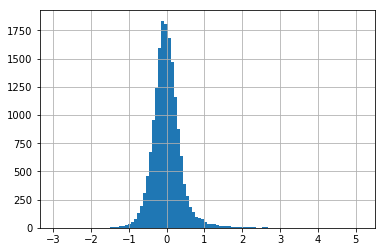

In [39]:
normalized_matrix[normalized_matrix.columns[0]].hist(bins=100)

# Histogram of First Gene

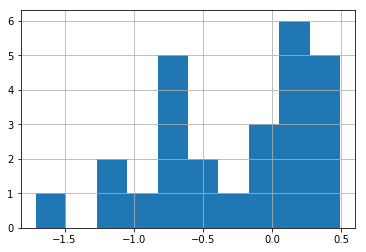

In [40]:
normalized_matrix.loc[normalized_matrix.index[0]].hist()

# Save Filtered Matrix

In [41]:
filename = path+'aba_dev_mic_tis_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [42]:
gene_list = mf.createGeneList(normalized_matrix)

In [43]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A4GALT,53947


In [44]:
gene_list.shape

(16827, 2)

# Save Gene List

In [45]:
filename = path+'aba_dev_mic_tis_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [46]:
attribute_list = mf.createAttributeList(normalized_matrix)

In [47]:
attribute_list.head()

""
Attributes
amygdaloid complex
anterior (rostral) cingulate (medial prefrontal) cortex
caudal ganglionic eminence
cerebellar cortex
cerebellum


In [48]:
attribute_list.shape

(26, 0)

# Save Attribute List

In [49]:
filename = path+'aba_dev_mic_tis_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [50]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [51]:
standard_matrix.head()

,amygdaloid complex,anterior (rostral) cingulate (medial prefrontal) cortex,caudal ganglionic eminence,cerebellar cortex,cerebellum,dorsal thalamus,dorsolateral prefrontal cortex,hippocampus (hippocampal formation),"inferolateral temporal cortex (area TEv, area 20)",lateral ganglionic eminence,...,posteroventral (inferior) parietal cortex,primary auditory cortex (core),"primary motor cortex (area M1, area 4)",primary motor-sensory cortex (samples),"primary somatosensory cortex (area S1, areas 3,1,2)","primary visual cortex (striate cortex, area V1/17)",striatum,temporal neocortex,upper (rostral) rhombic lip,ventrolateral prefrontal cortex
,,,,,,,,,,,,,,,,,,,,,
A1BG,0.268602,0.576290,-0.346796,0.883955,-0.962167,-0.885249,0.191679,-0.269878,0.422448,-0.808321,...,0.653204,0.807045,0.345525,0.037833,0.960910,0.730122,0.114756,-0.192936,-0.500633,-0.116013
A1CF,0.114756,-0.577552,0.653204,0.807045,0.730122,-0.500633,0.422448,-0.116013,0.883955,-0.731398,...,0.037833,0.191679,0.960910,-0.423715,0.576290,0.499367,0.268602,-0.808321,-0.192936,-0.039090
A2M,0.431573,0.123881,-0.799196,-0.029966,-0.722273,-0.568427,-0.260753,0.893079,0.585414,-0.953043,...,0.200804,0.277727,0.739247,-0.876124,0.662328,0.508491,0.816170,-0.491509,-0.183812,-0.106889
A2ML1,0.807045,0.422448,-0.731398,-0.269878,-0.423715,-0.577552,0.037833,0.883955,0.576290,-0.346796,...,-0.039090,0.114756,0.653204,-0.808321,0.730122,0.499367,0.268602,-0.500633,-0.192936,0.345525
A4GALT,-0.269878,-0.808321,0.576290,0.807045,0.960910,0.730122,0.191679,0.499367,-0.423715,-0.885249,...,-0.500633,-0.731398,0.422448,0.037833,-0.116013,-0.346796,0.268602,-0.962167,0.653204,0.345525


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

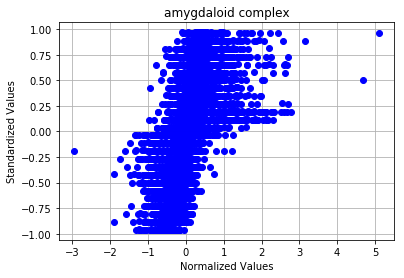

In [52]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [53]:
filename = path+'aba_dev_mic_tis_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [54]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [55]:
tertiary_matrix.head()

,amygdaloid complex,anterior (rostral) cingulate (medial prefrontal) cortex,caudal ganglionic eminence,cerebellar cortex,cerebellum,dorsal thalamus,dorsolateral prefrontal cortex,hippocampus (hippocampal formation),"inferolateral temporal cortex (area TEv, area 20)",lateral ganglionic eminence,...,posteroventral (inferior) parietal cortex,primary auditory cortex (core),"primary motor cortex (area M1, area 4)",primary motor-sensory cortex (samples),"primary somatosensory cortex (area S1, areas 3,1,2)","primary visual cortex (striate cortex, area V1/17)",striatum,temporal neocortex,upper (rostral) rhombic lip,ventrolateral prefrontal cortex
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,-1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A4GALT,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,0,0


# Save Teriary Matrix

In [56]:
filename = path+'aba_dev_mic_tis_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [57]:
name = 'aba_dev_mic_tis_gene_up_set'

In [58]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [59]:
name = 'aba_dev_mic_tis_gene_down_set'

In [60]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [61]:
name = 'aba_dev_mic_tis_attribute_up_set'

In [62]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [63]:
name = 'aba_dev_mic_tis_attribute_down_set'

In [64]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity Matrix

In [65]:
attribute_similarity_matix = mf.createSimilarityMatrix(normalized_matrix.T, 'cosine')

In [66]:
attribute_similarity_matix.head()

,amygdaloid complex,anterior (rostral) cingulate (medial prefrontal) cortex,caudal ganglionic eminence,cerebellar cortex,cerebellum,dorsal thalamus,dorsolateral prefrontal cortex,hippocampus (hippocampal formation),"inferolateral temporal cortex (area TEv, area 20)",lateral ganglionic eminence,...,posteroventral (inferior) parietal cortex,primary auditory cortex (core),"primary motor cortex (area M1, area 4)",primary motor-sensory cortex (samples),"primary somatosensory cortex (area S1, areas 3,1,2)","primary visual cortex (striate cortex, area V1/17)",striatum,temporal neocortex,upper (rostral) rhombic lip,ventrolateral prefrontal cortex
,,,,,,,,,,,,,,,,,,,,,
amygdaloid complex,1.000000,0.411509,0.498594,0.095580,0.220025,0.189302,0.175237,0.677064,0.370511,0.484902,...,-0.099189,0.078408,-0.050821,0.143034,-0.046031,0.122565,0.443431,0.334818,0.220146,-0.000748
anterior (rostral) cingulate (medial prefrontal) cortex,0.411509,1.000000,0.369020,0.037006,0.121473,0.216385,0.704486,0.419736,0.339447,0.359984,...,0.303036,0.310117,0.341847,0.423080,0.277780,0.354107,0.114344,0.362565,0.130380,0.510663
caudal ganglionic eminence,0.498594,0.369020,1.000000,0.129418,0.415801,0.482113,0.242561,0.402606,-0.022509,0.890194,...,-0.206070,-0.152654,-0.271458,0.605212,-0.294469,0.050880,0.253470,0.711617,0.436198,-0.057952
cerebellar cortex,0.095580,0.037006,0.129418,1.000000,0.317504,0.089715,0.006850,0.108502,-0.068878,0.124440,...,-0.087230,-0.040625,-0.047288,0.073880,-0.017177,0.107372,0.094257,0.100789,0.198078,-0.057880
cerebellum,0.220025,0.121473,0.415801,0.317504,1.000000,0.500512,0.076441,0.209158,-0.067282,0.456992,...,-0.180701,-0.123170,-0.230550,0.373693,-0.258207,-0.041507,0.168619,0.401016,0.784207,-0.055558


# Save Attribute Similarity Matrix

In [67]:
filename = path+'aba_dev_mic_tis_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

In [68]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

# Create Gene Similarity Matrix

In [69]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [70]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.447298,0.718114,0.611664,-0.455068,0.299376,-0.725979,0.461286,-0.021706,0.335994,...,-0.768059,-0.727480,-0.677139,0.219963,0.307877,-0.286664,0.386521,-0.356117,0.112546,-0.775789
A1CF,0.447298,1.000000,0.297041,0.495686,0.279910,0.436300,-0.599203,-0.011418,-0.088175,0.282723,...,-0.510094,-0.620818,-0.420316,0.225132,-0.087810,0.183261,0.378962,-0.011989,0.049618,-0.555221
A2M,0.718114,0.297041,1.000000,0.768726,-0.322327,0.120114,-0.842032,0.389230,-0.146864,0.417282,...,-0.854695,-0.810369,-0.649813,0.019187,0.260709,-0.380644,0.372175,-0.424805,-0.053485,-0.772153
A2ML1,0.611664,0.495686,0.768726,1.000000,-0.345972,0.375218,-0.901012,0.388726,-0.072177,0.469589,...,-0.897661,-0.778214,-0.781254,0.316628,0.256273,-0.255019,0.385762,-0.573149,-0.289402,-0.803190
A4GALT,-0.455068,0.279910,-0.322327,-0.345972,1.000000,-0.033030,0.239494,-0.616519,0.042880,0.019856,...,0.284751,0.111742,0.392426,-0.310289,-0.543519,0.409445,-0.042088,0.480797,0.008117,0.249705


# Save Gene Similarity Matrix

In [71]:
filename = path+'aba_dev_mic_tis_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [72]:
name = 'aba_dev_mic_tis_gene_attribute_edge_list'

In [73]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  26 Out of 26   

 The number of statisticaly relevent gene-attribute associations is: 33653
